In [2]:
from IPython.display import Audio
import librosa
from librosa import display
import numpy as np
import scipy
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
y, sr = librosa.load('wav_files/28_Dance_music.wav', sr = 22050) # Use the default sampling rate of 22,050 Hz

In [4]:
Audio(y, rate = sr)

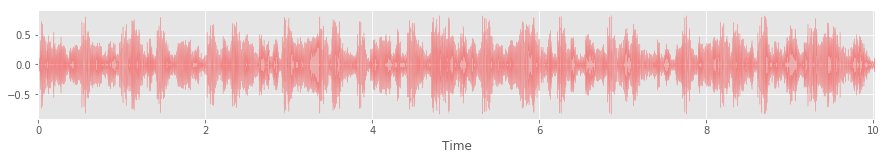

In [5]:
plt.figure(figsize=(15,2))
librosa.display.waveplot(y  = y,
                     sr     = sr, 
                     max_sr = 1000, 
                     alpha  = 0.25, 
                     color  = 'red')

### Part I: Time Domain Features

1) Statistical moments calculated on the raw audio

In [6]:
print('Signal mean = {:.2f}'.format(np.mean(abs(y))))
print('Signal std dev = {:.2f}'.format(np.std(y)))
print('Signal skewness = {:.2f}'.format(scipy.stats.skew(abs(y))))
print('Signal kurtosis = {:.2f}'.format(scipy.stats.kurtosis(y)))

Signal mean = 0.14
Signal std dev = 0.19
Signal skewness = 1.45
Signal kurtosis = 1.11


2) Zero crossing rate

ZCR mean = 0.10
ZCR std dev = 0.05


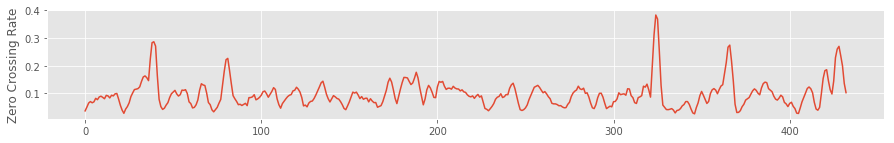

In [7]:
# Add a small constant before computing the zero crossing rate to disregard unwanted silence 'noise'
zcr = librosa.feature.zero_crossing_rate(y + 0.0001, frame_length=2048, hop_length=512)[0]
plt.figure(figsize=(15,2))
plt.plot(zcr)
plt.ylabel('Zero Crossing Rate')
print('ZCR mean = {:.2f}'.format(np.mean(zcr)))
print('ZCR std dev = {:.2f}'.format(np.std(zcr)))

3) Root Mean Squared Energy

RMSE mean = 0.18
RMSE std dev = 0.06


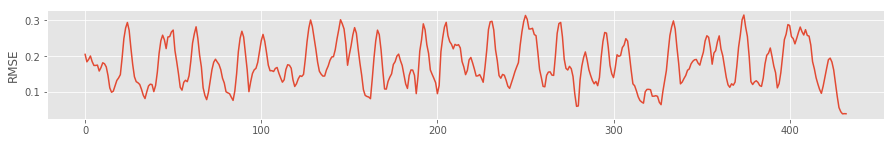

In [8]:
rmse = librosa.feature.rmse(y + 0.0001)[0]
plt.figure(figsize=(15,2))
plt.plot(rmse)
plt.ylabel('RMSE')
print('RMSE mean = {:.2f}'.format(np.mean(rmse)))
print('RMSE std dev = {:.2f}'.format(np.std(rmse)))

### Part II: Spectral Features

1) Spectral Centroid: frequency area around which most of the signal energy concentrates<br>
$f_c = \frac{\Sigma_k S(k)f(k)}{\Sigma_k S(k)}$<br>
where  S(k) is the spectral magnitude at frequency bin  k <br>
f(k) is the frequency at bin  k

Spectral Centroid mean = 2226.22
Spectral Centroid std dev = 702.23


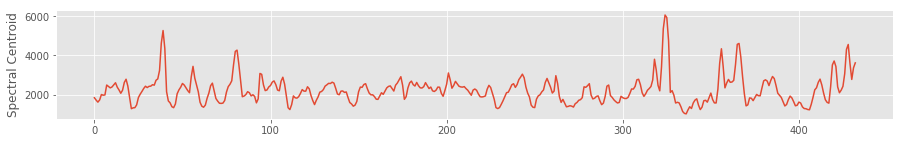

In [9]:
spectral_centroids = librosa.feature.spectral_centroid(y+0.01, sr=sr)[0]
plt.figure(figsize=(15,2))
plt.plot(spectral_centroids)
plt.ylabel('Spectral Centroid')
print('Spectral Centroid mean = {:.2f}'.format(np.mean(spectral_centroids)))
print('Spectral Centroid std dev = {:.2f}'.format(np.std(spectral_centroids)))

2) Spectral Band-width: Other moments calculated around the spectral centroid <br>
$f_c = (\Sigma_k S(k)f(k) - f_c)^\frac{1}{p}$ <br>
When  p=2 this is like a weighted standard deviation.

Spectral Bandwidth-2 mean = 2333.66
Spectral Bandwidth-2 std dev = 361.55
Spectral Bandwidth-3 mean = 2857.74
Spectral Bandwidth-3 std dev = 309.13
Spectral Bandwidth-4 mean = 3355.26
Spectral Bandwidth-4 std dev = 272.03


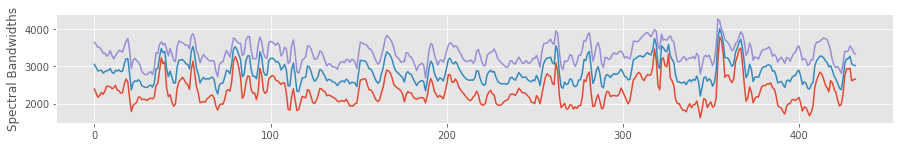

In [10]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=2)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15,2))
plt.plot(spectral_bandwidth_2)
plt.plot(spectral_bandwidth_3)
plt.plot(spectral_bandwidth_4)
plt.ylabel('Spectral Bandwidths')
print('Spectral Bandwidth-2 mean = {:.2f}'.format(np.mean(spectral_bandwidth_2)))
print('Spectral Bandwidth-2 std dev = {:.2f}'.format(np.std(spectral_bandwidth_2)))
print('Spectral Bandwidth-3 mean = {:.2f}'.format(np.mean(spectral_bandwidth_3)))
print('Spectral Bandwidth-3 std dev = {:.2f}'.format(np.std(spectral_bandwidth_3)))
print('Spectral Bandwidth-4 mean = {:.2f}'.format(np.mean(spectral_bandwidth_4)))
print('Spectral Bandwidth-4 std dev = {:.2f}'.format(np.std(spectral_bandwidth_4)))
# Highly Correlated features may cause issues in the model building

3) Spectral Contrast: considers the spectral peak, the spectral valley, and their difference in each frequency subband. Usually, 6 sub-bands

Means [20.32064583 16.29202568 17.17115757 17.12829481 17.32244512 17.13310932
 33.87084111]
Std devs [4.87079903 4.54260465 4.62499724 4.13035397 3.20436455 2.88184041
 3.67413613]


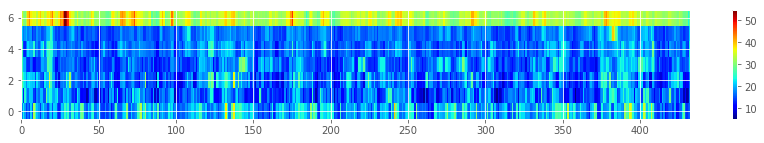

In [11]:
# Frequency cutoff for the first bin `[0, fmin]`
# Subsequent bins will cover `[fmin, 2*fmin]`, `[2*fmin, 4*fmin]
# Bins are on log scale
spectral_contrast = librosa.feature.spectral_contrast(y, sr=sr, n_bands = 6, fmin = 200.0)
plt.figure(figsize=(15,2))
plt.imshow(spectral_contrast, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
print('Means', np.mean(spectral_contrast, axis=1)) # Values are on dB scale
print('Std devs', np.std(spectral_contrast, axis=1)) 

4) Spectral Roll-off: the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.

Spectral Centroid mean = 4725.34
Spectral Centroid std dev = 1307.96


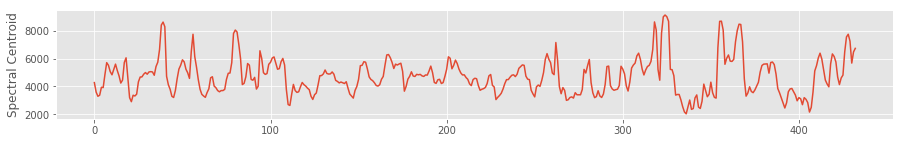

In [12]:
spectral_rolloff = librosa.feature.spectral_rolloff(y+0.01, sr=sr, roll_percent = 0.85)[0]
plt.figure(figsize=(15,2))
plt.plot(spectral_rolloff)
plt.ylabel('Spectral Centroid')
print('Spectral Centroid mean = {:.2f}'.format(np.mean(spectral_rolloff)))
print('Spectral Centroid std dev = {:.2f}'.format(np.std(spectral_rolloff)))

# What would be a good roll_percent to use?

5) Mel-Frequency Cepstral Coefficients

Means [-72.48158597  92.888812    -7.79460887  37.55710713  -2.7770134
   7.73550304  -5.83702447   9.67849176  -1.45626322   0.77144525
  -1.61440057  -3.2331675   -4.37714354  -2.00496695  -8.61834039
   0.80516316 -12.28782684   0.46296102  -7.4830548   -3.42302555]
Std devs [46.38038184 25.27366144 18.20624097 20.13919839 14.26144807 13.10179044
 12.73587218  9.40750862  9.3360162   9.88439929  8.6351649   7.5377428
  7.88638826  6.37740848  7.9171975   6.81265982  7.95440116  5.76149854
  6.86978159  5.7673976 ]


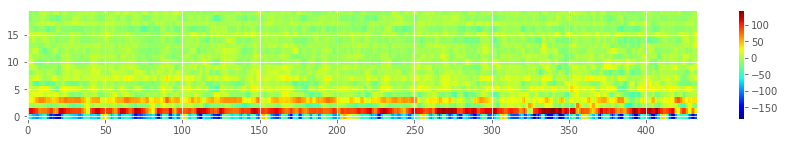

In [13]:
mfccs = librosa.feature.mfcc(y, sr=sr, n_mfcc=20)
plt.figure(figsize=(15,2))
plt.imshow(mfccs, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
print('Means', np.mean(mfccs, axis=1)) 
print('Std devs', np.std(mfccs, axis=1)) 

6) Chroma Features (STFT)
A chroma vector (Wikipedia) is a typically a 12-element feature vector indicating how much energy of each pitch class, {C, C#, D, D#, E, ..., B}, is present in the signal.

Means [0.5799712  0.48438347 0.41942221 0.31639566 0.31428931 0.2623254
 0.21501021 0.26188192 0.29516381 0.37646325 0.36019517 0.45100665]
Std devs [0.34541481 0.29925016 0.335075   0.2796858  0.27876574 0.24045143
 0.19791976 0.24175999 0.26683857 0.33632249 0.30124426 0.32700764]


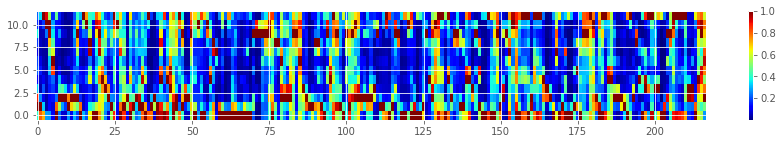

In [14]:
chroma_stft = librosa.feature.chroma_stft(y, sr=sr, hop_length=1024)
plt.figure(figsize=(15,2))
plt.imshow(chroma_stft, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
print('Means', np.mean(chroma_stft, axis=1)) 
print('Std devs', np.std(chroma_stft, axis=1)) 

7) Chroma Features (CQT)

Means [0.72909441 0.64504061 0.53560138 0.49980718 0.54401408 0.48185041
 0.49363472 0.59019115 0.62416298 0.63246126 0.59864091 0.71312749]
Std devs [0.20820539 0.21329511 0.25062015 0.19508868 0.20146354 0.1779242
 0.1979393  0.25245316 0.27371604 0.28000894 0.22667117 0.22447798]


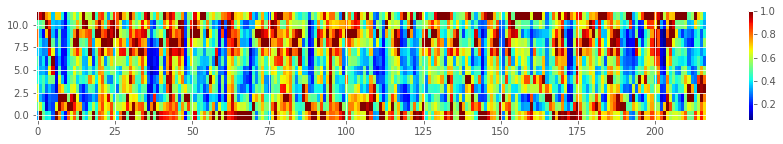

In [15]:
chroma_cqt = librosa.feature.chroma_cqt(y, sr=sr, hop_length=1024)
plt.figure(figsize=(15,2))
plt.imshow(chroma_cqt, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
print('Means', np.mean(chroma_cqt, axis=1)) 
print('Std devs', np.std(chroma_cqt, axis=1)) 

8) Chroma Features (CENS) - Chroma energy normalized statistics

Means [0.36557234 0.31802578 0.23902217 0.23218991 0.25902792 0.21870894
 0.21125536 0.27120523 0.30184142 0.30617038 0.29412399 0.35449008]
Std devs [0.05006362 0.04079856 0.05439471 0.04205114 0.04937675 0.03108944
 0.02519015 0.03358227 0.04661559 0.06661362 0.03064573 0.04926882]


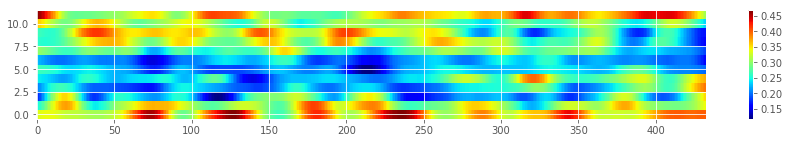

In [16]:
chroma_cens = librosa.feature.chroma_cens(y, sr=sr, hop_length=512)
plt.figure(figsize=(15,2))
plt.imshow(chroma_cens, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
print('Means', np.mean(chroma_cens, axis=1)) 
print('Std devs', np.std(chroma_cens, axis=1)) 